Method found: baseline
Execution Time for baseline: 15.2711
Method found: pthread_only
Execution Time for pthread_only: 0.8598
Method found: openmp_only
Execution Time for openmp_only: 1.0795
Method found: simd_only
Execution Time for simd_only: 1.6558
Method found: pthread_simd
Execution Time for pthread_simd: 0.3057
Method found: openmp_tiling
Execution Time for openmp_tiling: 0.5781
Method found: openmp_simd
Execution Time for openmp_simd: 0.2336
Method found: openmp_simd_tiling
Execution Time for openmp_simd_tiling: 0.3165


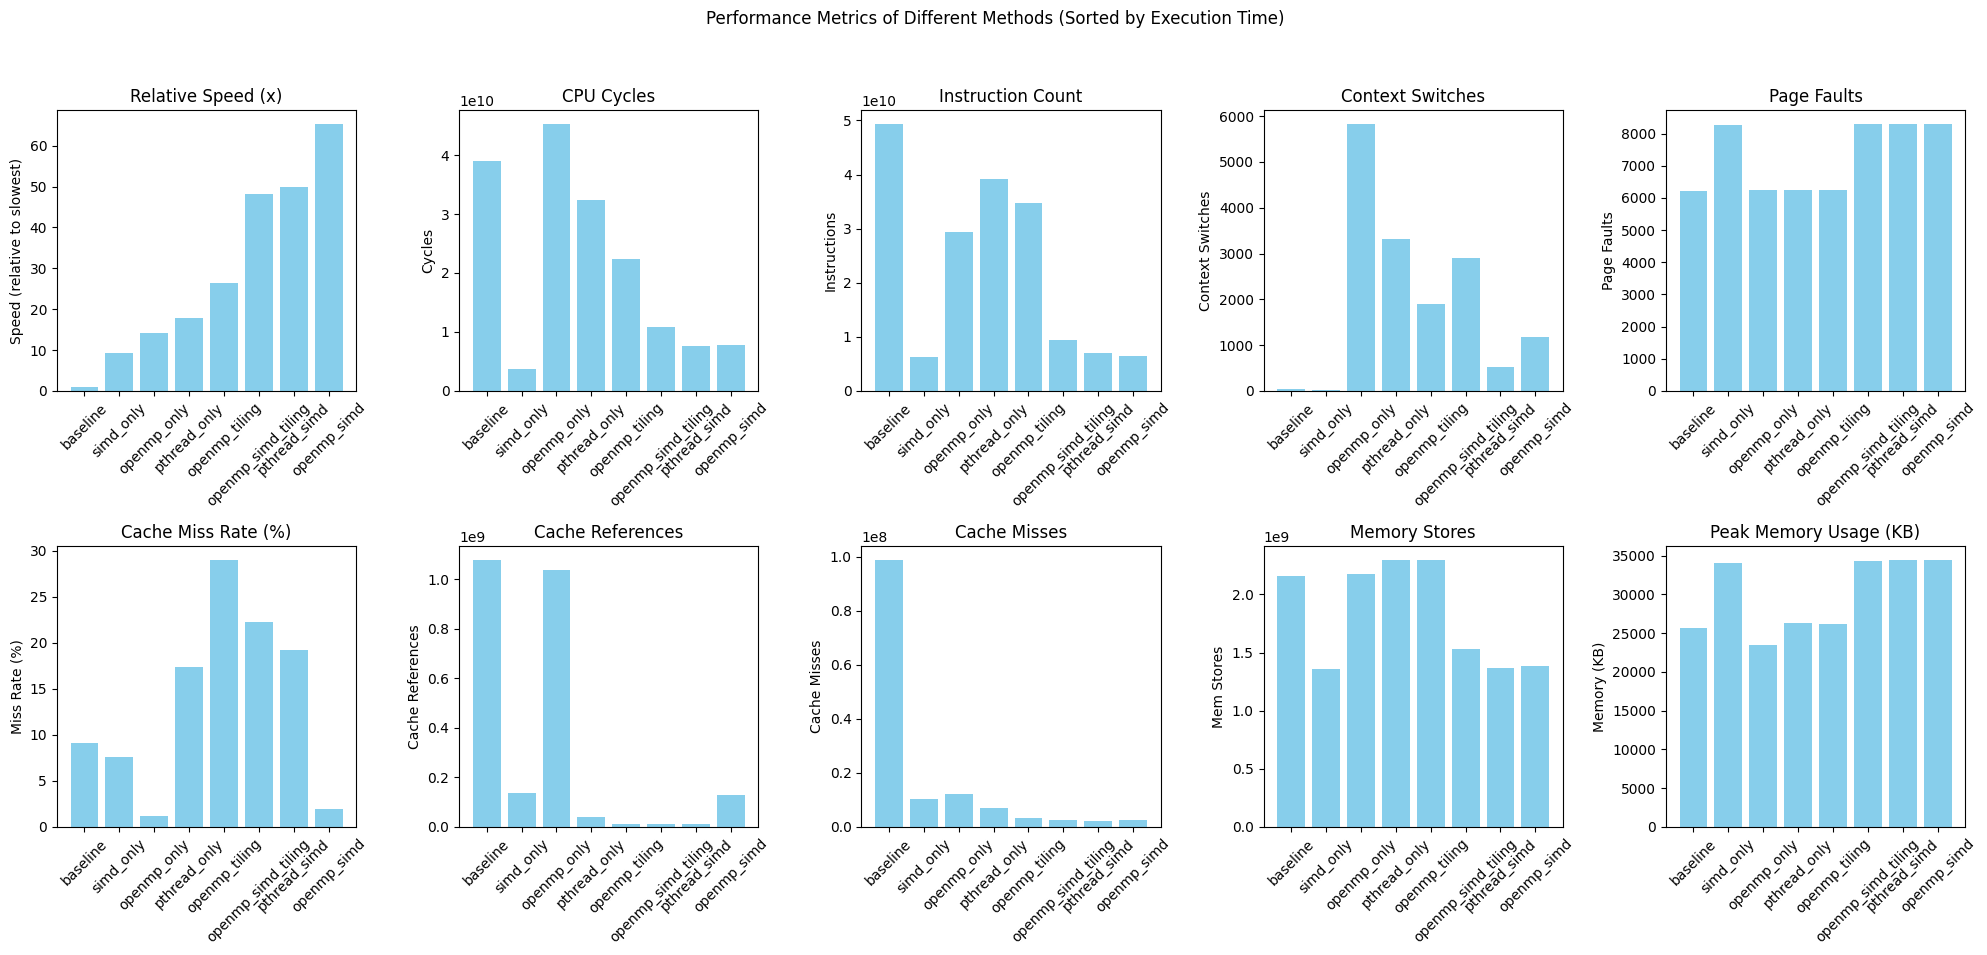

In [37]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 定义正则表达式，用于解析 txt 文件
pattern_time = re.compile(r'Execution Time:\s+(\d+\.\d+) s')
pattern_cycles = re.compile(r'([\d,]+)\s+cycles')
pattern_instructions = re.compile(r'([\d,]+)\s+instructions')
pattern_cache_misses = re.compile(r'([\d,]+)\s+cache-misses')
pattern_cache_refs = re.compile(r'([\d,]+)\s+cache-references')
pattern_context_switches = re.compile(r'([\d,]+)\s+context-switches')
pattern_page_faults = re.compile(r'([\d,]+)\s+page-faults')
pattern_mem_stores = re.compile(r'([\d,]+)\s+mem-stores')
pattern_peak_memory = re.compile(r'Current Peak Memory:\s+(\d+)\s+KB')

# 存储方法名称和对应数据
methods = []
times = []
cycles = []
instructions = []
cache_misses = []
cache_refs = []
context_switches = []
page_faults = []
mem_stores = []
peak_memory = []

# 读取并解析文件
with open('perf_results.txt', 'r') as file:
    lines = file.readlines()
    method = ""
    for line in lines:
        if "Running" in line:
            method = line.split("...")[0].split()[-1]
            methods.append(method)
            print(f"Method found: {method}")
        elif match := pattern_time.search(line):
            time = float(match.group(1))
            times.append(time)
            print(f"Execution Time for {method}: {time}")
        elif match := pattern_cycles.search(line):
            cycles.append(int(match.group(1).replace(',', '')))
        elif match := pattern_instructions.search(line):
            instructions.append(int(match.group(1).replace(',', '')))
        elif match := pattern_cache_misses.search(line):
            cache_misses.append(int(match.group(1).replace(',', '')))
        elif match := pattern_cache_refs.search(line):
            cache_refs.append(int(match.group(1).replace(',', '')))
        elif match := pattern_context_switches.search(line):
            context_switches.append(int(match.group(1).replace(',', '')))
        elif match := pattern_page_faults.search(line):
            page_faults.append(int(match.group(1).replace(',', '')))
        elif match := pattern_mem_stores.search(line):
            mem_stores.append(int(match.group(1).replace(',', '')))
        elif match := pattern_peak_memory.search(line):
            peak_memory.append(int(match.group(1)))

# 检查所有数据列表长度是否一致
data_lists = [times, cycles, instructions, cache_misses, cache_refs, context_switches, page_faults, mem_stores, peak_memory]
if not all(len(lst) == len(methods) for lst in data_lists):
    print("Error: Inconsistent data length detected.")
    print(f"Methods: {len(methods)}, Times: {len(times)}, Cache Misses: {len(cache_misses)}, and others.")

# 计算缓存缺失率
cache_miss_rate = [misses / refs * 100 if refs > 0 else 0 for misses, refs in zip(cache_misses, cache_refs)]

# 将数据按执行时间排序
sorted_indices = np.argsort(times)[::-1]  # 从大到小排序
methods = [methods[i] for i in sorted_indices]
times = [times[i] for i in sorted_indices]
cycles = [cycles[i] for i in sorted_indices]
instructions = [instructions[i] for i in sorted_indices]
cache_miss_rate = [cache_miss_rate[i] for i in sorted_indices]
context_switches = [context_switches[i] for i in sorted_indices]
page_faults = [page_faults[i] for i in sorted_indices]
mem_stores = [mem_stores[i] for i in sorted_indices]
cache_refs = [cache_refs[i] for i in sorted_indices]
cache_misses = [cache_misses[i] for i in sorted_indices]
peak_memory = [peak_memory[i] for i in sorted_indices]

# 转换 Execution Time 为相对速度
min_time = max(times)  # 最慢的执行时间作为基准
relative_speed = [min_time / t for t in times]

# 创建图形
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Performance Metrics of Different Methods (Sorted by Execution Time)')

# 绘制各项指标的柱状图
metrics = [
    (relative_speed, 'Relative Speed (x)', 'Speed (relative to slowest)'),
    (cycles, 'CPU Cycles', 'Cycles'),
    (instructions, 'Instruction Count', 'Instructions'),
    (context_switches, 'Context Switches', 'Context Switches'),
    (page_faults, 'Page Faults', 'Page Faults'),
    (cache_miss_rate, 'Cache Miss Rate (%)', 'Miss Rate (%)'),
    (cache_refs, 'Cache References', 'Cache References'),
    (cache_misses, 'Cache Misses', 'Cache Misses'),
    (mem_stores, 'Memory Stores', 'Mem Stores'),
    (peak_memory, 'Peak Memory Usage (KB)', 'Memory (KB)')
]

# 绘制每个指标的子图
for ax, (data, title, ylabel) in zip(axs.flat, metrics):
    ax.bar(methods, data, color='skyblue')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
